In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch.nn as nn


In [2]:
df = pd.read_csv('df_scaled.csv')

In [3]:
df['track_popularity'].head()

0    66
1    67
2    70
3    60
4    69
Name: track_popularity, dtype: int64

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd





numerical_features = ['speechiness', 'acousticness', 'instrumentalness', 
                      'liveness', 'valence', 'tempo', 'duration_ms']

X = df[numerical_features].values
y = df['track_popularity'].values  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Deje este escalado estandar porque mejora los resultados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Conversion a tensores de pytorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Modelo 1
class MusicNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(MusicNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


input_size = X_train.shape[1]
output_size = 1  

model = MusicNet(input_size, output_size)
loss_fn = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)
test_losses = []

epochs = 10

for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = 0
    model.train()  
    
    for batch, (X_batch, y_batch) in enumerate(train_dataloader):
        
        # Forward pass
        y_pred = model(X_batch).squeeze()
        loss = loss_fn(y_pred, y_batch)
        
        # Backward pass
        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step()       

        train_loss += loss.item()

        if batch % 400 == 0:
            print(f"Batch {batch}, Loss: {loss.item()}")
    
    avg_train_loss = train_loss / len(train_dataloader)
    print(f"Train Loss: {avg_train_loss:.4f}")

    # Evaluation Loop
    model.eval()  
    test_loss = 0
    
    with torch.no_grad():  
        for X_batch, y_batch in test_dataloader:
            y_pred = model(X_batch).squeeze()
            loss = loss_fn(y_pred, y_batch)
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_dataloader)
    test_losses.append(avg_test_loss)  
    print(f"Test Loss: {avg_test_loss:.4f}")


Epoch 1
-------------------------------
Batch 0, Loss: 2316.53271484375
Batch 400, Loss: 576.7124633789062
Train Loss: 722.8816
Test Loss: 568.2537
Epoch 2
-------------------------------
Batch 0, Loss: 535.7620239257812
Batch 400, Loss: 568.2903442382812
Train Loss: 550.4359
Test Loss: 554.1148
Epoch 3
-------------------------------
Batch 0, Loss: 545.4156494140625
Batch 400, Loss: 555.6561889648438
Train Loss: 540.8632
Test Loss: 543.2188
Epoch 4
-------------------------------
Batch 0, Loss: 482.41046142578125
Batch 400, Loss: 490.25872802734375
Train Loss: 535.4343
Test Loss: 543.5154
Epoch 5
-------------------------------
Batch 0, Loss: 581.5091552734375
Batch 400, Loss: 640.6427001953125
Train Loss: 533.7024
Test Loss: 541.6274
Epoch 6
-------------------------------
Batch 0, Loss: 733.5675048828125
Batch 400, Loss: 485.4431457519531
Train Loss: 532.0943
Test Loss: 542.3040
Epoch 7
-------------------------------
Batch 0, Loss: 452.65216064453125
Batch 400, Loss: 469.2083740234

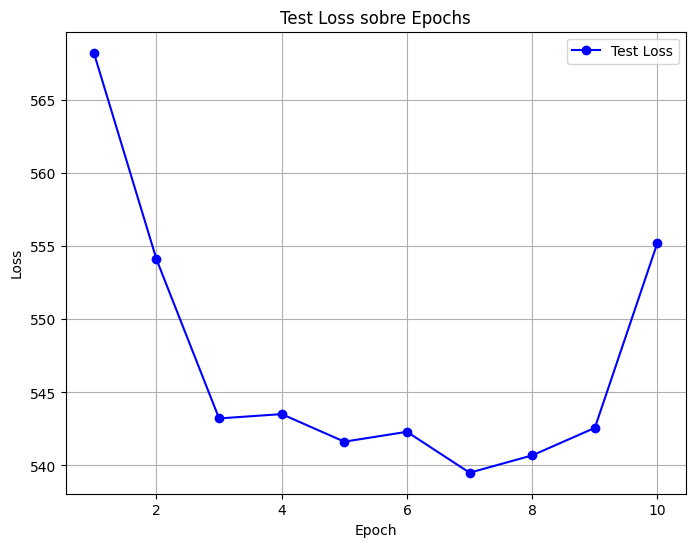

In [5]:
import matplotlib.pyplot as plt


epochs_list = list(range(1, epochs + 1))

# Plot de los resultados
plt.figure(figsize=(8, 6))
plt.plot(epochs_list, test_losses, marker='o', linestyle='-', color='b', label='Test Loss')
plt.title('Test Loss sobre Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import math

rmse = math.sqrt(avg_test_loss)
print(f"RMSE: {rmse:.4f}")


RMSE: 23.5637


Esto significa que le erra por 20 unidades. Vamos a mejorar

In [7]:

numerical_features_2 = ['acousticness', 'instrumentalness', 
                      'liveness', 'valence', 'tempo']

X = df[numerical_features_2].values
y = df['track_popularity'].values  # Target track_popularity


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [8]:
#modelo 2
class MusicNet_2(nn.Module):
    def __init__(self, input_size, output_size):
        super(MusicNet_2, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


input_size = X_train.shape[1]
output_size = 1  

model = MusicNet_2(input_size, output_size)
loss_fn = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.01)
test_losses = []

epochs = 10

for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = 0
    model.train()  
    
    for batch, (X_batch, y_batch) in enumerate(train_dataloader):
        # Forward pass
        y_pred = model(X_batch).squeeze()
        loss = loss_fn(y_pred, y_batch)
        
        # Backward pass
        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step()       
        train_loss += loss.item()

        if batch % 400 == 0:
            print(f"Batch {batch}, Loss: {loss.item()}")
    
    avg_train_loss = train_loss / len(train_dataloader)
    print(f"Train Loss: {avg_train_loss:.4f}")

    # Evaluation Loop
    model.eval() 
    test_loss = 0
    
    with torch.no_grad():  
        for X_batch, y_batch in test_dataloader:
            y_pred = model(X_batch).squeeze()
            loss = loss_fn(y_pred, y_batch)
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_dataloader)
    test_losses.append(avg_test_loss) 
    print(f"Test Loss: {avg_test_loss:.4f}")


Epoch 1
-------------------------------
Batch 0, Loss: 2069.114013671875
Batch 400, Loss: 702.7811279296875
Train Loss: 627.9414
Test Loss: 553.7502
Epoch 2
-------------------------------
Batch 0, Loss: 364.843994140625
Batch 400, Loss: 554.4971313476562
Train Loss: 546.9130
Test Loss: 554.3876
Epoch 3
-------------------------------
Batch 0, Loss: 374.58758544921875
Batch 400, Loss: 700.0718994140625
Train Loss: 546.4796
Test Loss: 554.4470
Epoch 4
-------------------------------
Batch 0, Loss: 666.7865600585938
Batch 400, Loss: 313.3857116699219
Train Loss: 545.6602
Test Loss: 554.2150
Epoch 5
-------------------------------
Batch 0, Loss: 563.968505859375
Batch 400, Loss: 544.7978515625
Train Loss: 544.8796
Test Loss: 550.7854
Epoch 6
-------------------------------
Batch 0, Loss: 604.8516845703125
Batch 400, Loss: 463.326416015625
Train Loss: 544.3599
Test Loss: 555.0756
Epoch 7
-------------------------------
Batch 0, Loss: 608.6893310546875
Batch 400, Loss: 617.4927368164062
Tra

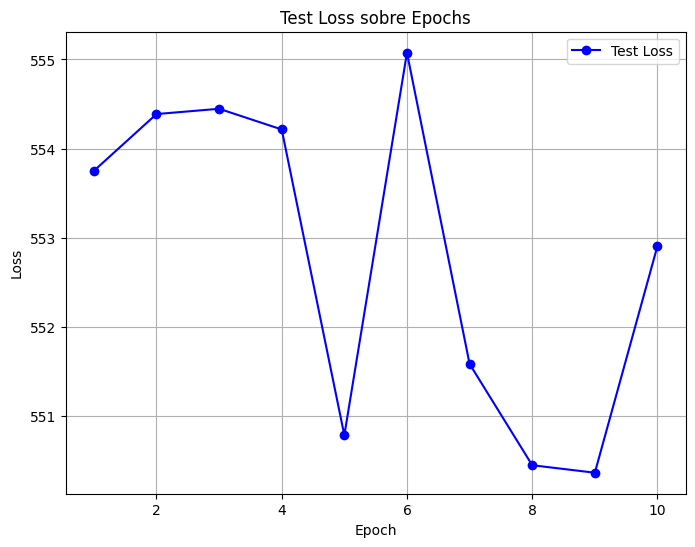

In [9]:
import matplotlib.pyplot as plt


epochs_list = list(range(1, epochs + 1))


plt.figure(figsize=(8, 6))
plt.plot(epochs_list, test_losses, marker='o', linestyle='-', color='b', label='Test Loss')
plt.title('Test Loss sobre Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
rmse = math.sqrt(avg_test_loss)
print(f"RMSE: {rmse:.4f}")

RMSE: 23.5140
